# Boom Bikes Linear Model

#### The steps to be followed in this exercise are as follows:
- Loading, understanding and visualizing the data check for missing and unique values pool
- creating the data for model training (derving feature attributes for X axis,train-test split, rescaling)
- Fit the line for data and Train the model
- Residual analysis and other type of analysis for understanding 
- Run model with Test set , Prediction and evaluation of the test set

In [130]:
import numpy as np # Math library
import pandas as pd # data processing, CSV file I/O #To work with dataset
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import seaborn as sns #Graph library that use matplot in background
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

### Reading Data

In [94]:
bikeData = pd.read_csv("day.csv")

In [41]:
bikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Understanding

In [4]:
bikeData.shape

(730, 16)

In [5]:
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikeData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Missing Value and Value Disturbution via unique check

In [7]:
print ("Rows     : " ,bikeData.shape[0])
print ("Columns  : " ,bikeData.shape[1])
print ("\nFeatures : \n" ,bikeData.columns.tolist())
print ("\nMissing values :  ", bikeData.isnull().sum().values.sum())
print ("\nUnique values :  \n",bikeData.nunique())

Rows     :  730
Columns  :  16

Features : 
 ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

Missing values :   0

Unique values :  
 instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64


##### insights: 
There is No Missing value and We can see Instant and dteday have all unique values as of total row count is 730. Also can say season [yr, mnth, holiday, weekday, workingday, weathersit] feilds are best fits for Categorial feature as they are having small pool of unique values remaining part can be considered as continuous as it have a very good spread in values pool used


#### Visualize the data to check correaltion visibly and understanding

In [8]:
#creating list of a continuos varible
continousVar=["instant","temp","atemp","hum","windspeed","casual","registered","cnt"]
continousVar

['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

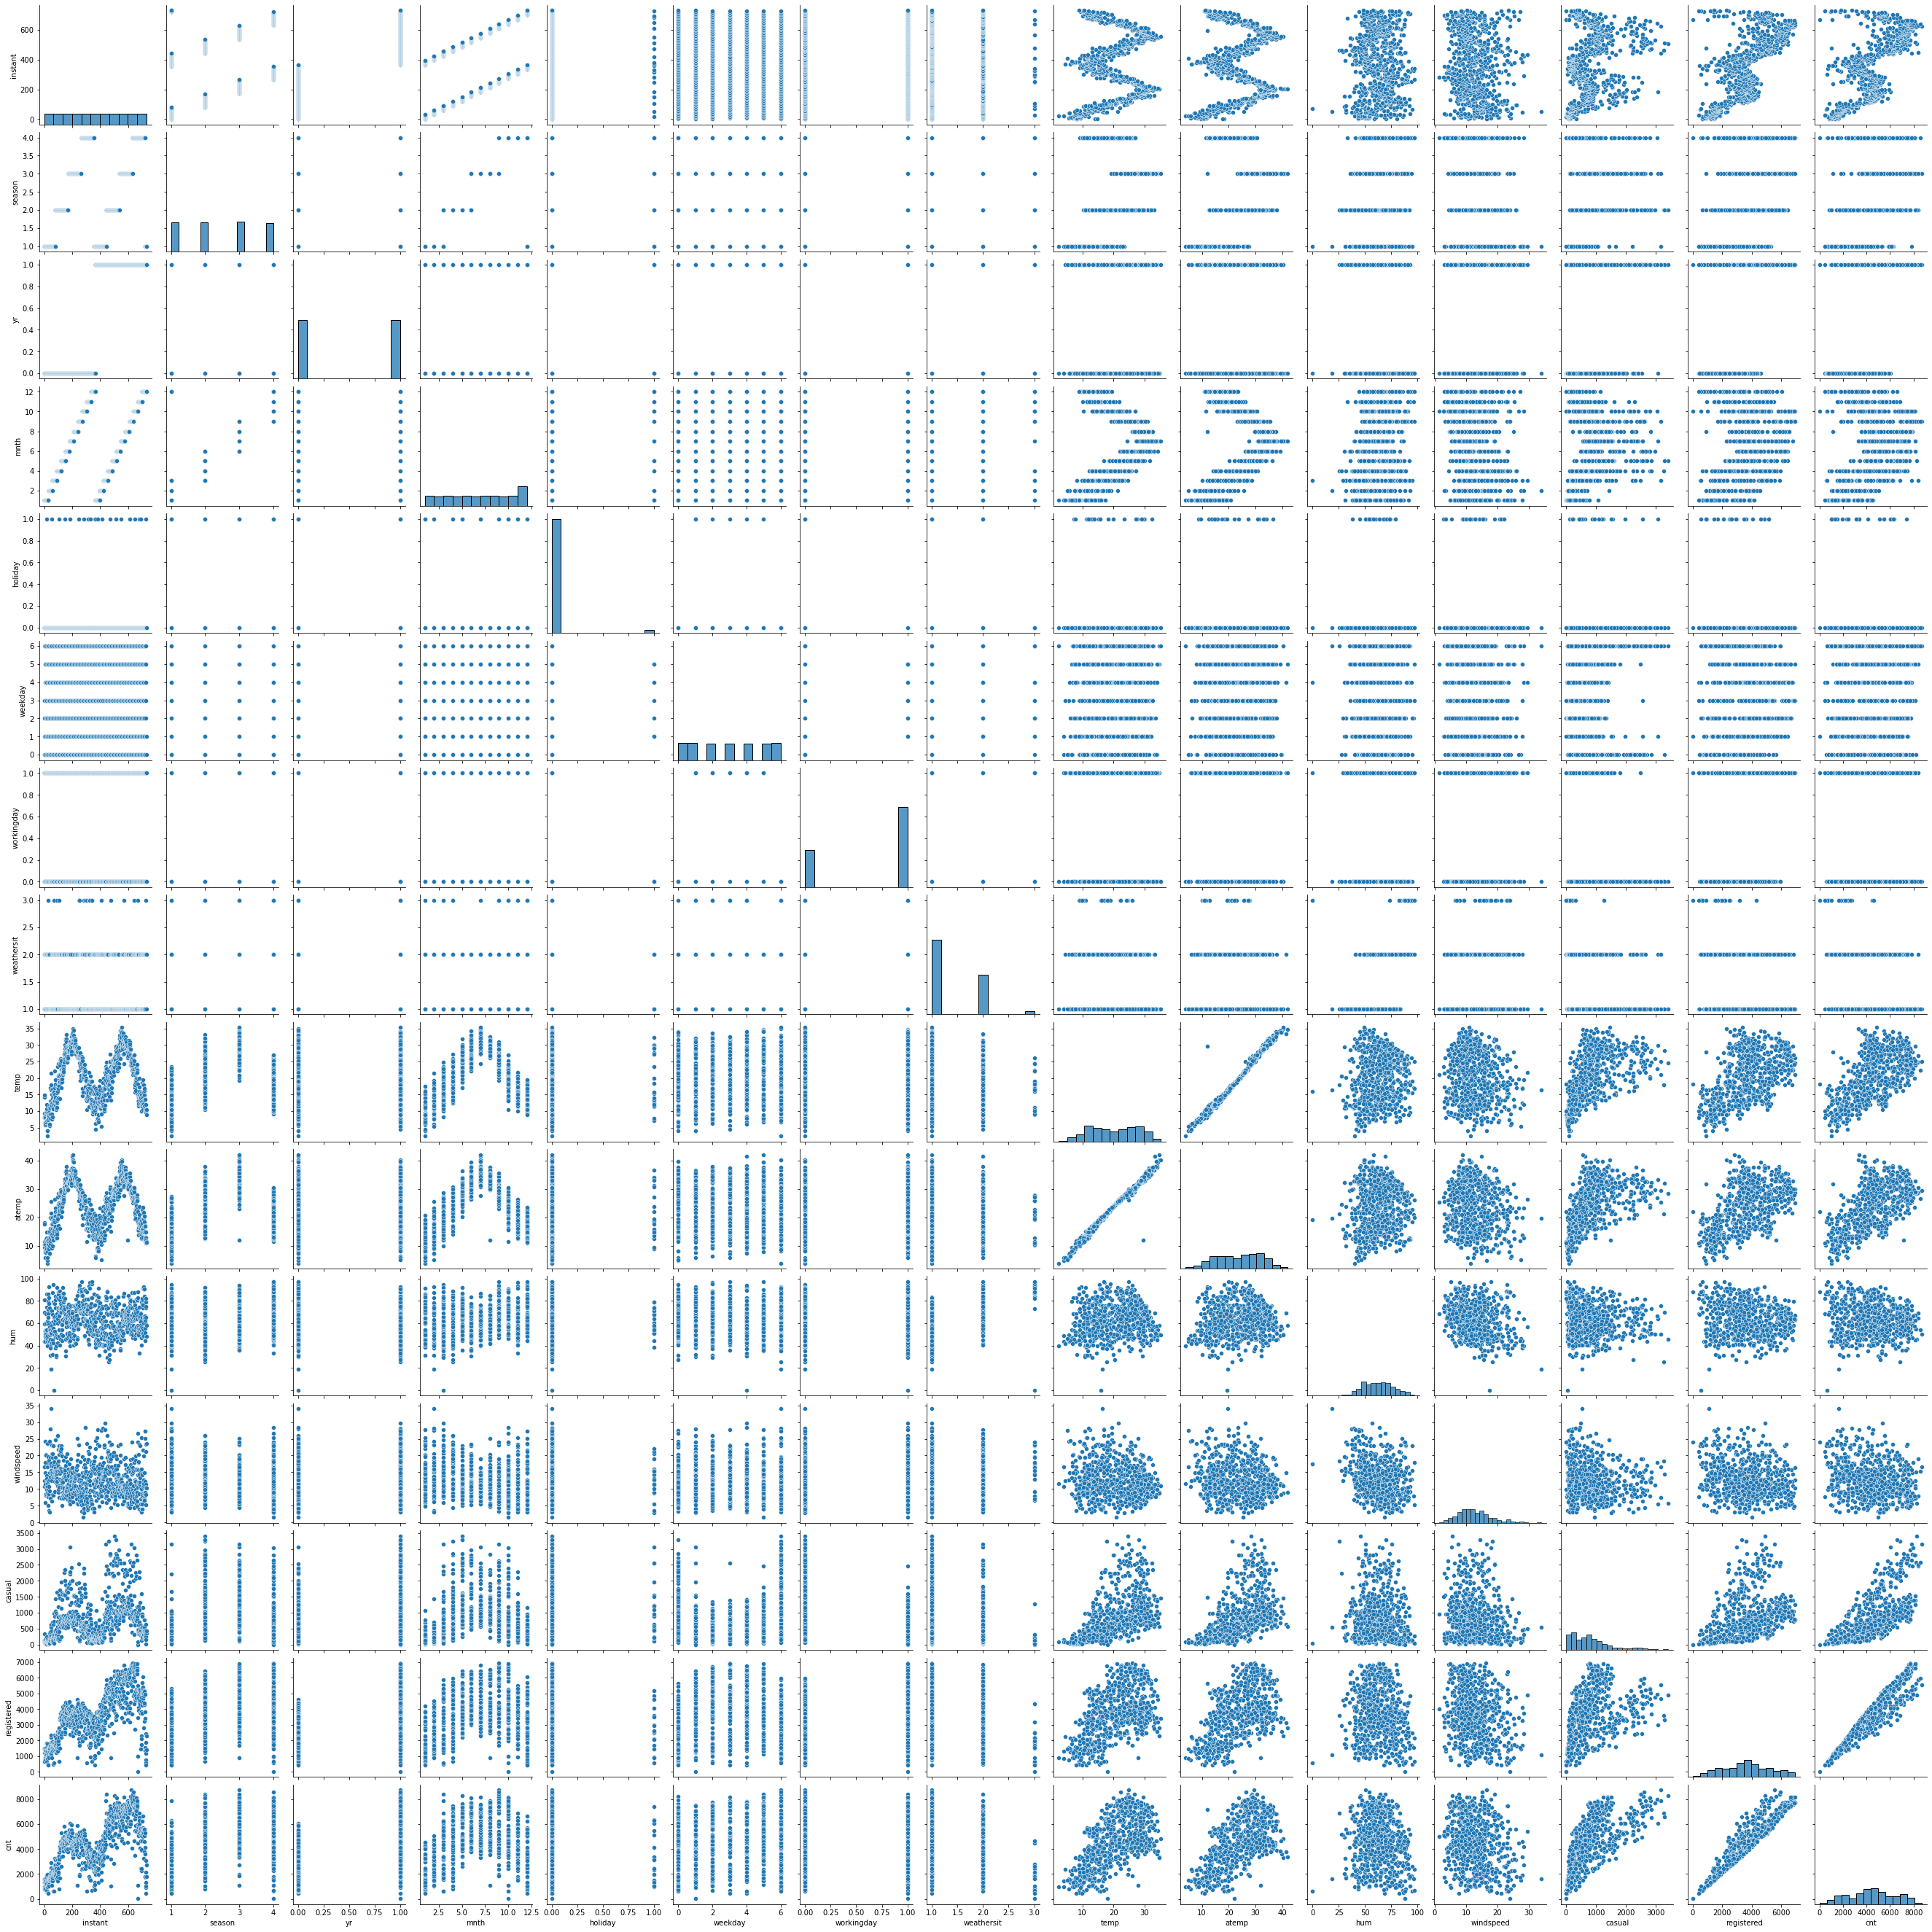

In [9]:
# pair plot for the all features to have a overview
sns.pairplot(bikeData)
plt.show()

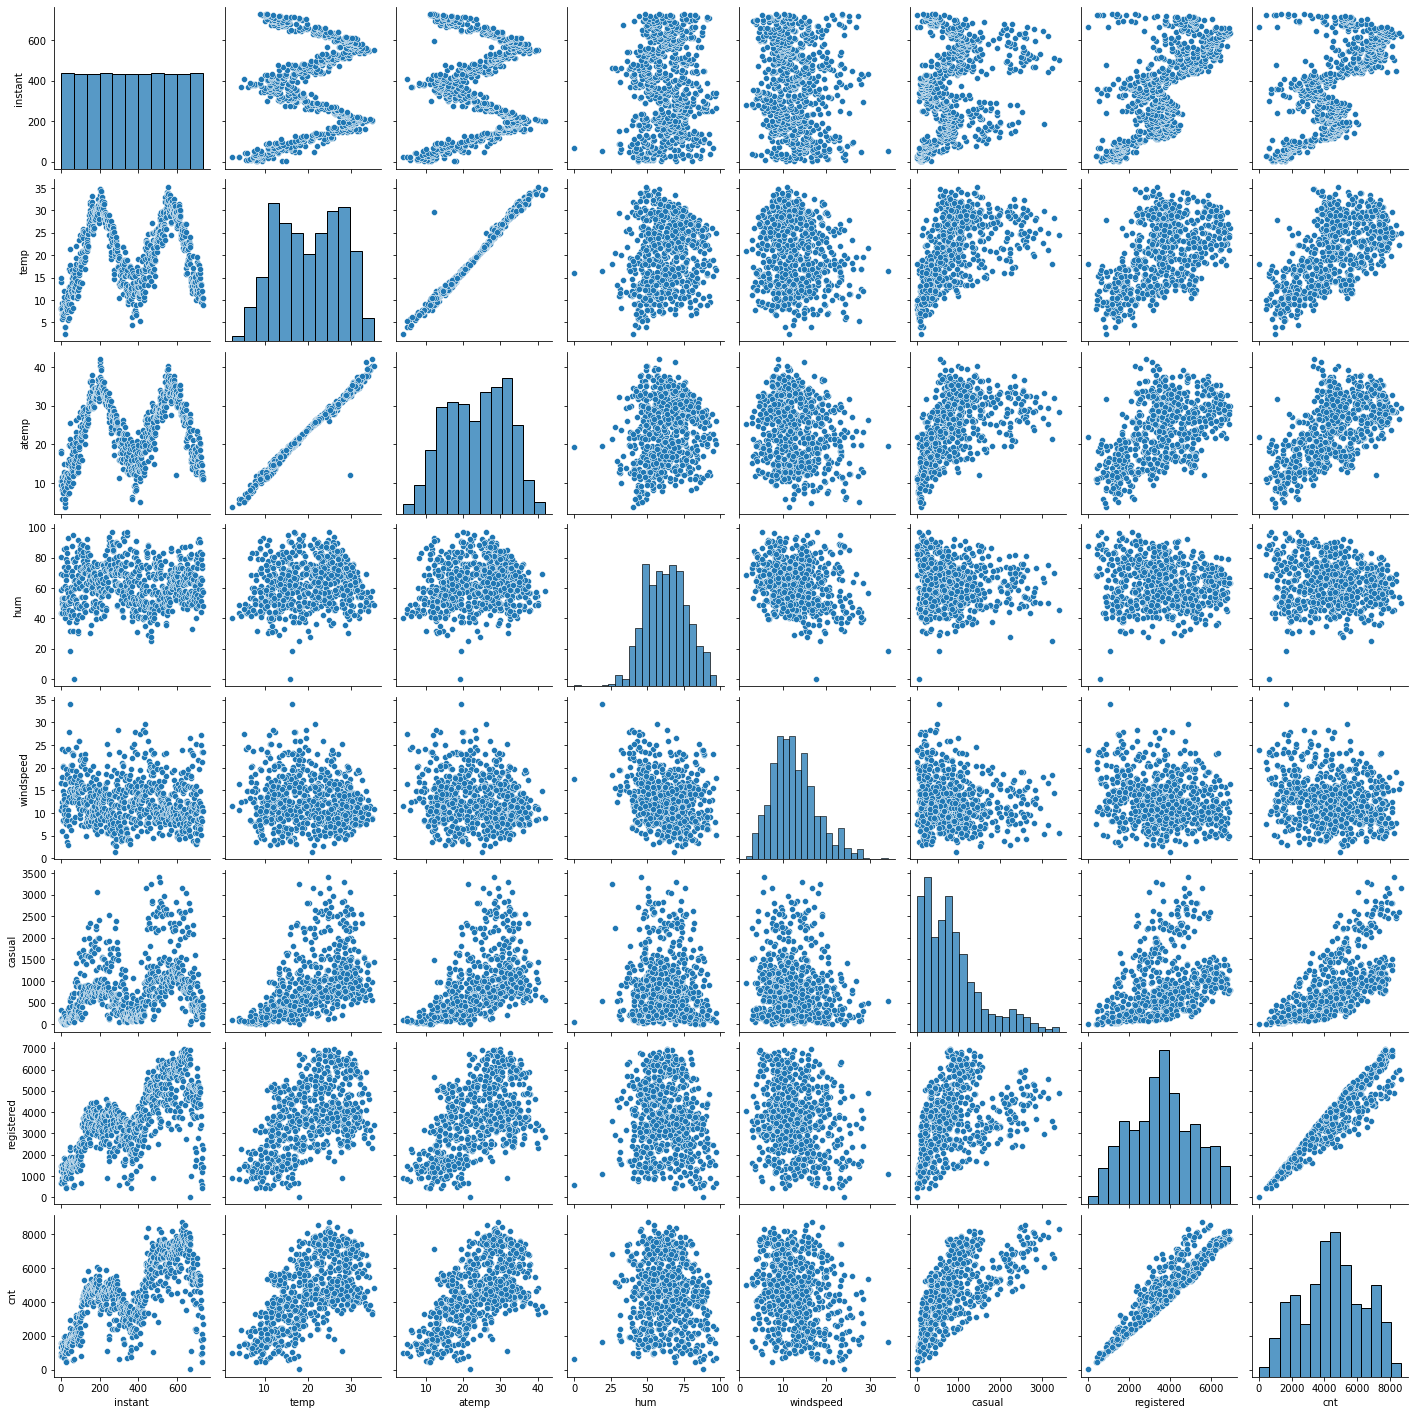

In [10]:
# Pair plot for continous 
sns.pairplot(bikeData,vars=continousVar)
plt.show()

High corelation found bewtween count variable and temperature, humidity and windspeed, So these can be depndenst fetaure of analysis
#### Let check for Categorial Attributes

In [12]:
bikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [83]:
categoricalVar = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
categoricalVar

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [63]:
for var in categoricalVar:
    print("Attribute: "+var)
    print(bikeData[var].value_counts())
    print("\n")

Attribute: season
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


Attribute: yr
0    365
1    365
Name: yr, dtype: int64


Attribute: mnth
Jan     62
Mar     62
May     62
July    62
Aug     62
Oct     62
Dec     62
Apr     60
June    60
Sep     60
Nov     60
Feb     56
Name: mnth, dtype: int64


Attribute: holiday
0    709
1     21
Name: holiday, dtype: int64


Attribute: weekday
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64


Attribute: workingday
1    499
0    231
Name: workingday, dtype: int64


Attribute: weathersit
Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64




In [95]:
# Changing the spot values for Categorial attributes
bikeData['season']=bikeData.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bikeData['mnth']=bikeData.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikeData['weathersit']=bikeData.weathersit.map({1: 'Clear',2:'Mist',3:'Light Snow',4:'Snow + Fog'})
bikeData['weekday']=bikeData.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bikeData['yr']=bikeData.yr.map({0:'2018',1:'2019'})
bikeData['holiday']=bikeData.holiday.map({0:'NotHoliday',1:'Holiday'})

bikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,NotHoliday,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,NotHoliday,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,NotHoliday,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,NotHoliday,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,NotHoliday,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Attributes is : Count * season


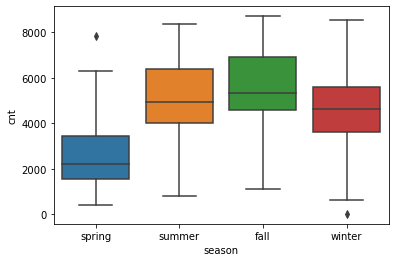

Attributes is : Count * yr


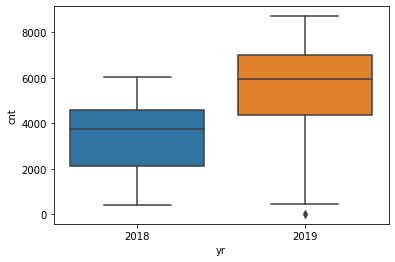

Attributes is : Count * mnth


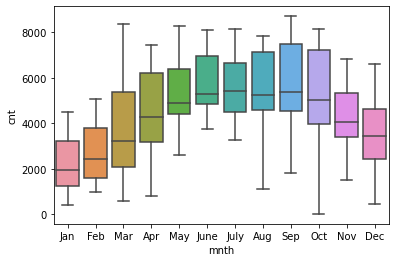

Attributes is : Count * holiday


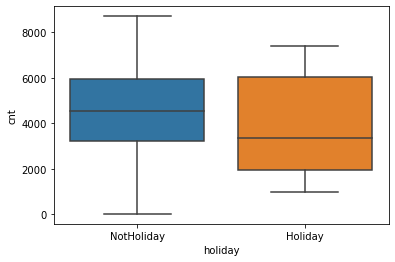

Attributes is : Count * weekday


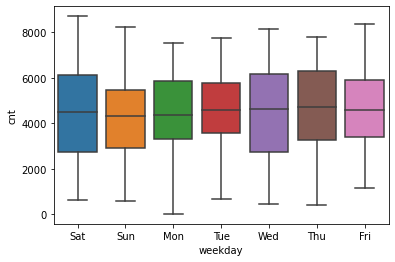

Attributes is : Count * workingday


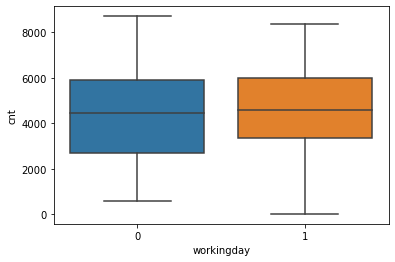

Attributes is : Count * weathersit


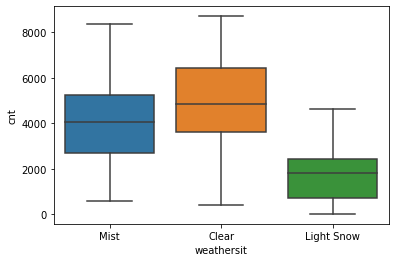

In [100]:
# BoxPlot Analysis for categorical variables
for var in categoricalVar:
    print("Attributes is : Count * "+var)
    sns.boxplot(x=var, y="cnt", data=bikeData)
    plt.show()

### Insights from Box Plot 
- Summer And Fall is the demanding season 
- There is progress in number of usege of bike form year 2018 to 2019
- September and october month is high demanding months
- there is more demands on holiday Mainly for Saturday
- clear Weather leads to more usages and demand of bikes

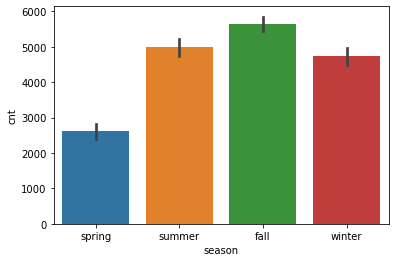

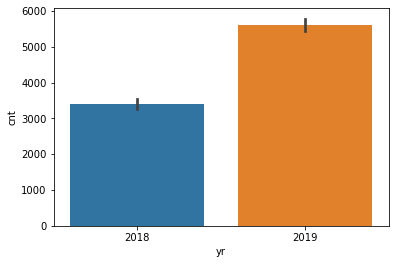

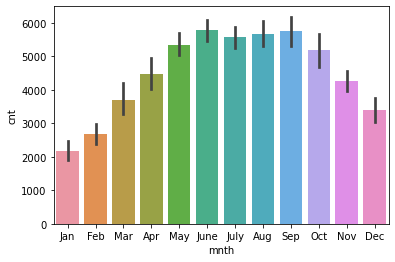

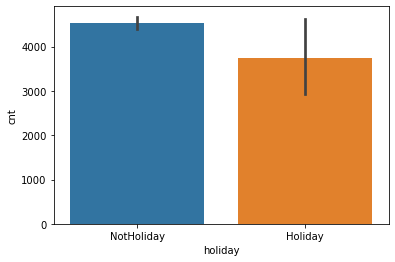

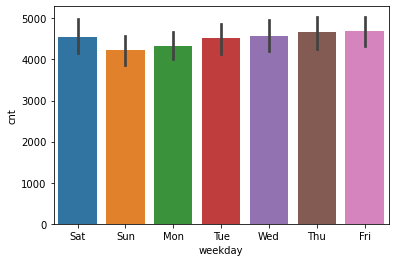

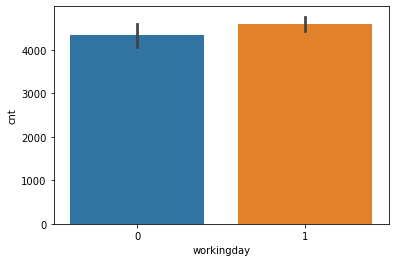

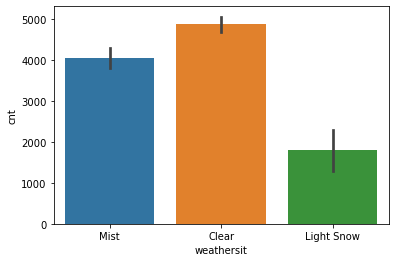

In [97]:
# BarPlot Analysis for categorical variables
for var in categoricalVar:
    sns.barplot(x=var, y="cnt", data=bikeData)
    plt.show()

### Data Prepration 

In [123]:
# Adding Dummy variable to categorical varibales
yrDummy = pd.get_dummies(bikeData['yr'], drop_first = True)
holidayDummy = pd.get_dummies(bikeData['holiday'], drop_first = True)
seasonDummy = pd.get_dummies(bikeData['season'], drop_first = True)
monthDummy = pd.get_dummies(bikeData['mnth'], drop_first = True)
weekdayDummy = pd.get_dummies(bikeData['weekday'], drop_first = True)
weathersitDummy = pd.get_dummies(bikeData['weathersit'], drop_first = True)

In [124]:
holidayDummy.head()

,NotHoliday
0,1
1,1
2,1
3,1
4,1


In [125]:
bikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,NotHoliday,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,NotHoliday,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,NotHoliday,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,NotHoliday,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,NotHoliday,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [126]:
bikeDataWD = pd.concat([bikeData,yrDummy,holidayDummy, seasonDummy, monthDummy, weekdayDummy, weathersitDummy], axis = 1)
ridDataAD = ['yr','holiday','season', 'mnth', 'weekday', 'weathersit']
bikeDataWD.drop(bikeDataWD[ridDataAD], axis = 1, inplace=True)
bikeDataWD.head()

,instant,dteday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,1,01-01-2018,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,1,0,0,0,0,0,1
1,2,02-01-2018,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,1,0,0,0,0,1
2,3,03-01-2018,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,1,0,0,0
4,5,05-01-2018,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,1,0,0


In [127]:
bikeDataWD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   casual      730 non-null    int64  
 8   registered  730 non-null    int64  
 9   cnt         730 non-null    int64  
 10  2019        730 non-null    uint8  
 11  NotHoliday  730 non-null    uint8  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  Aug         730 non-null    uint8  
 16  Dec         730 non-null    uint8  
 17  Feb         730 non-null    uint8  
 18  Jan         730 non-null    uint8  
 19  July        730 non-null    u

### Test and Train data creation form dummy data set

In [133]:
modelTrain, modelTest = train_test_split(bikeDataWD, train_size = 0.7, test_size = 0.3, random_state = 100)

In [140]:
print(modelTrain.shape) , modelTest.shape

(510, 34)


(None, (219, 34))